In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import zipfile
path = '/content/gdrive/MyDrive/data/딥러닝'

# 개 고양이 이미지 자료 다운로드
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \-O /content/gdrive/MyDrive/data/딥러닝/tmp/cats_and_dogs_filtered.zip

# 현재작업폴더 하위의 tmp폴더에 있는 zip 파일 압축해제
local_zip = '/content/gdrive/MyDrive/data/딥러닝/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./tmp')
zip_ref.close()

print('--end---')


# 작업경로 설정

#-----------기본경로
base_dir = './tmp/cats_and_dogs_filtered'

# 기본경로+폴더명 작성  (폴더명을 os.listdir 로 가져와서 작업해도 됨)
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

print('end')


--2021-10-13 05:47:19--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 173.194.196.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/gdrive/MyDrive/data/딥러닝/tmp/cats_and_dogs_filtered.zip’

/content/gdrive/MyD 100%[===================>]  65.43M  34.8MB/s    in 1.9s    

2021-10-13 05:47:21 (34.8 MB/s) - ‘/content/gdrive/MyDrive/data/딥러닝/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

--end---
end


In [3]:
train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)
validation_cats_fnames = os.listdir(validation_cats_dir)
validation_dogs_fnames = os.listdir(validation_dogs_dir) 

In [4]:
## 트레인 데ㅣㅇ터 고양이 강아지 사진수
#검즘용 데이터 고양이 강아지 사진수

print(len(train_cats_fnames), len(train_dogs_fnames))
print(len(validation_cats_fnames), len(validation_dogs_fnames))

1000 1000
500 500


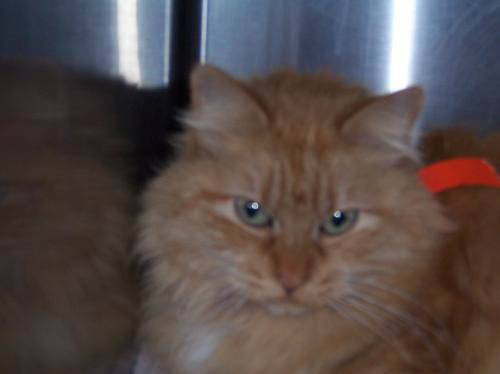

In [5]:
from PIL import Image

sam = train_cats_dir + '/'+ train_cats_fnames[0]

Image.open(sam)

In [6]:
## 텐서의 이미지제너레이터를 이용하여 데이터를 스케일링
## 단순히 스케일링만 하는게 아니라 회전, 확대등 증강기술들이 사용하게됨
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
# 모델 fit 할떄 입력하는 훈련자료와 테스트 자료에 사용함

In [7]:
train_dir

'./tmp/cats_and_dogs_filtered/train'

In [8]:
# 훈련과 테스트(val)의 레이블이 필요함.
# 훈련과 테스트 자료를 폴더단위로 배치만큼만 읽으면서 x,y 값의 형태를 제작
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    target_size=(150,150),
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(validation_dir,
                                                    batch_size=20,
                                                    target_size=(150,150),
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
import numpy as np
len(train_generator) #100개인 이유 배치가 20이고 전체자료 2000개 
len(test_generator) # 50개인 이유 배치가 20이고 전체자료 10000

50

In [10]:
np.shape(train_generator[0][1][0])

()

In [11]:
np.shape(train_generator[0][0])

(20, 150, 150, 3)

In [12]:
#train_generator[0][1][0] 첫번째 배치의 첫번쨰사진의 개 고양이 0, 1
#train_generator[0][0][0] 첫번째 배치의 첫번쨰 사진의 배열

#[] 배치
# [] 이미지와 y값
# [] 사진번호

In [13]:
len(train_generator[0]) # y값과 사진값 0번째는 이미지값, 1번째는 y값

2

0.0

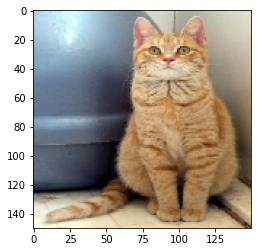

In [14]:
##첫번쨰사진
import matplotlib.pyplot as plt

plt.imshow(train_generator[20][0][2]) 
train_generator[20][1][2]

#개면 1 고양이면 0
## [0][0][0] 첫번째 개사진
## [1][0][0] 첫번째 고양이 사진

In [15]:
len(train_generator[0])   # 2는 이미지자료를갖고있는 array와 레이블 정보를 갖고있는 array 2개있음.

# 사진이미지 pixcel값
# train_generator[0][0] : 이미지 값
#train_generator[0][0][0],train_generator[0][0][1],train_generator[0][0][2]

# 개,고양이 레이블값
np.shape(train_generator[0][1]) # cat는 0, dog는 1로 고양이와 개의 bool값


len(train_generator)   # 배치단위 갯수 
# train_generator[0], train_generator[1], train_generator[2] ..... train_generator[99]  해서 100개의 배치자료가 있음.
# train_generator[0][0][0] => 0번째배치(0~99번째사진)의 사진중 사진이미지를 갖고있는 array의 첫번째 사진
# train_generator[0][1][0] => 0번째배치(0~99번째사진)의 사진중 레이블 이미지를 갖고있는 array의 첫번째 레이블값

# train_generator[1][0][0] => 1번째배치(100~199번째사진)의 사진중 사진이미지를 갖고있는 array의 첫번째 사진


100

In [16]:
# 모델구축
# param 계산 필터 *필터 *채널(색)(input 수) * 유닛수 + 바이어수수(유닛수)

# 실제로는 파람계산보다 output shape를 계사는하는게 훨씬 중요하다
#  Output Shape 계산공식 (input shape수 - 필터 + 2*패딩수) / 스프라이드 수 1
# 첫번쨰 model.add 의경우 (150-3+2*0)/(1+1)
# 두번쨰 model.add 의 경우 input shape를 반토만 낸다 그래서 (74-3+2*0)/(1+1)

from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),               # 필터 = 무작위의 값을 갖는 3*3 의 9개의 픽셀 9개의 weight 가 생김
                                                # 9개의 픽셀이 이미지의 각 픽셀과 곱셈 즉 3*3필터가 3개의 채널(색)을 모두 계산해야함
                                                # w값이 3*3*3 * 32 +32 여서 896개의 Param이 나온다
                        activation='relu', 
                        input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu')) #32 * 64* 3 * 3  + 64
model.add(layers.Conv2D(128,(3,3), activation='relu')) #32 * 128* 3 * 3  +128


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 128)       73856     
Total params: 93,248
Trainable params: 93,248
Non-trainable params: 0
_________________________________________________________________


In [18]:
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))   
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())   # 7*7*128=6272
model.add(layers.Dense(512, activation='relu'))  
model.add(layers.Dense(1, activation='sigmoid'))


In [19]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100, 
      epochs=30,
      validation_data=test_generator,
      validation_steps=50)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 42s 110ms/step - loss: 0.6860 - acc: 0.5395 - val_loss: 0.6733 - val_acc: 0.5250
Epoch 2/30
100/100 [==============================] - 11s 111ms/step - loss: 0.6529 - acc: 0.6280 - val_loss: 0.6318 - val_acc: 0.6320
Epoch 3/30
100/100 [==============================] - 11s 111ms/step - loss: 0.5975 - acc: 0.6900 - val_loss: 0.6134 - val_acc: 0.6460
Epoch 4/30
100/100 [==============================] - 11s 112ms/step - loss: 0.5579 - acc: 0.7140 - val_loss: 0.5982 - val_acc: 0.6780
Epoch 5/30
100/100 [==============================] - 11s 112ms/step - loss: 0.5301 - acc: 0.7375 - val_loss: 0.6527 - val_acc: 0.6500
Epoch 6/30
100/100 [==============================] - 11s 113ms/step - loss: 0.5117 - acc: 0.7410 - val_loss: 0.5736 - val_acc: 0.6940
Epoch 7/30
100/100 [==============================] - 11s 111ms/step - loss: 0.4813 - acc: 0.7640 - val_loss: 0.5521 - val_acc: 0.7050
Epoch 8/30
100/100 [==============================] - 1